In [ ]:
'''
dataset: https://www.kaggle.com/c/dog-breed-identification

framework: pytorch (transfer learning)
'''

'\ndataset: https://www.kaggle.com/c/dog-breed-identification\n\nframework: pytorch (transfer learning)\n'

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# notebook imports

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import time

In [ ]:
train_labels = pd.read_csv('../input/dog-breed-identification/labels.csv')
train_labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# encoding each breed for a number

labels_names=train_labels['breed'].unique()
labels_sorted=labels_names.sort()

labels = dict(zip(range(len(labels_names)),labels_names))
print(labels)

{0: 'affenpinscher', 1: 'afghan_hound', 2: 'african_hunting_dog', 3: 'airedale', 4: 'american_staffordshire_terrier', 5: 'appenzeller', 6: 'australian_terrier', 7: 'basenji', 8: 'basset', 9: 'beagle', 10: 'bedlington_terrier', 11: 'bernese_mountain_dog', 12: 'black-and-tan_coonhound', 13: 'blenheim_spaniel', 14: 'bloodhound', 15: 'bluetick', 16: 'border_collie', 17: 'border_terrier', 18: 'borzoi', 19: 'boston_bull', 20: 'bouvier_des_flandres', 21: 'boxer', 22: 'brabancon_griffon', 23: 'briard', 24: 'brittany_spaniel', 25: 'bull_mastiff', 26: 'cairn', 27: 'cardigan', 28: 'chesapeake_bay_retriever', 29: 'chihuahua', 30: 'chow', 31: 'clumber', 32: 'cocker_spaniel', 33: 'collie', 34: 'curly-coated_retriever', 35: 'dandie_dinmont', 36: 'dhole', 37: 'dingo', 38: 'doberman', 39: 'english_foxhound', 40: 'english_setter', 41: 'english_springer', 42: 'entlebucher', 43: 'eskimo_dog', 44: 'flat-coated_retriever', 45: 'french_bulldog', 46: 'german_shepherd', 47: 'german_short-haired_pointer', 48: '

In [ ]:
# putting the encoded labels into the dataframe

lbl=[]
for i in range(len(train_labels['breed'])):
    temp=list(labels.values()).index(train_labels.breed[i])
    lbl.append(temp)

    
train_labels['lbl'] = lbl
train_labels['lbl'] = train_labels['lbl'].astype(str)
train_labels.head()

,id,breed,lbl
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,19
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,37
2,001cdf01b096e06d78e9e5112d419397,pekinese,85
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,15
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,49


In [ ]:
path_img=[]
TRAIN_DIR = '../input/dog-breed-identification/train'

for i in range(len(train_labels['id'])):
    temp=TRAIN_DIR + "/" + str(train_labels.id[i]) + ".jpg"
    path_img.append(temp)

train_labels['path_img'] =path_img
train_labels.head()

,id,breed,lbl,path_img
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,19,../input/dog-breed-identification/train/000bec...
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,37,../input/dog-breed-identification/train/001513...
2,001cdf01b096e06d78e9e5112d419397,pekinese,85,../input/dog-breed-identification/train/001cdf...
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,15,../input/dog-breed-identification/train/00214f...
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,49,../input/dog-breed-identification/train/0021f9...


In [ ]:
print('total training images: ' + str(len(train_labels['id'])))
print('total nos of classes: '  + str(len(labels)))

total training images: 10222
total nos of classes: 120


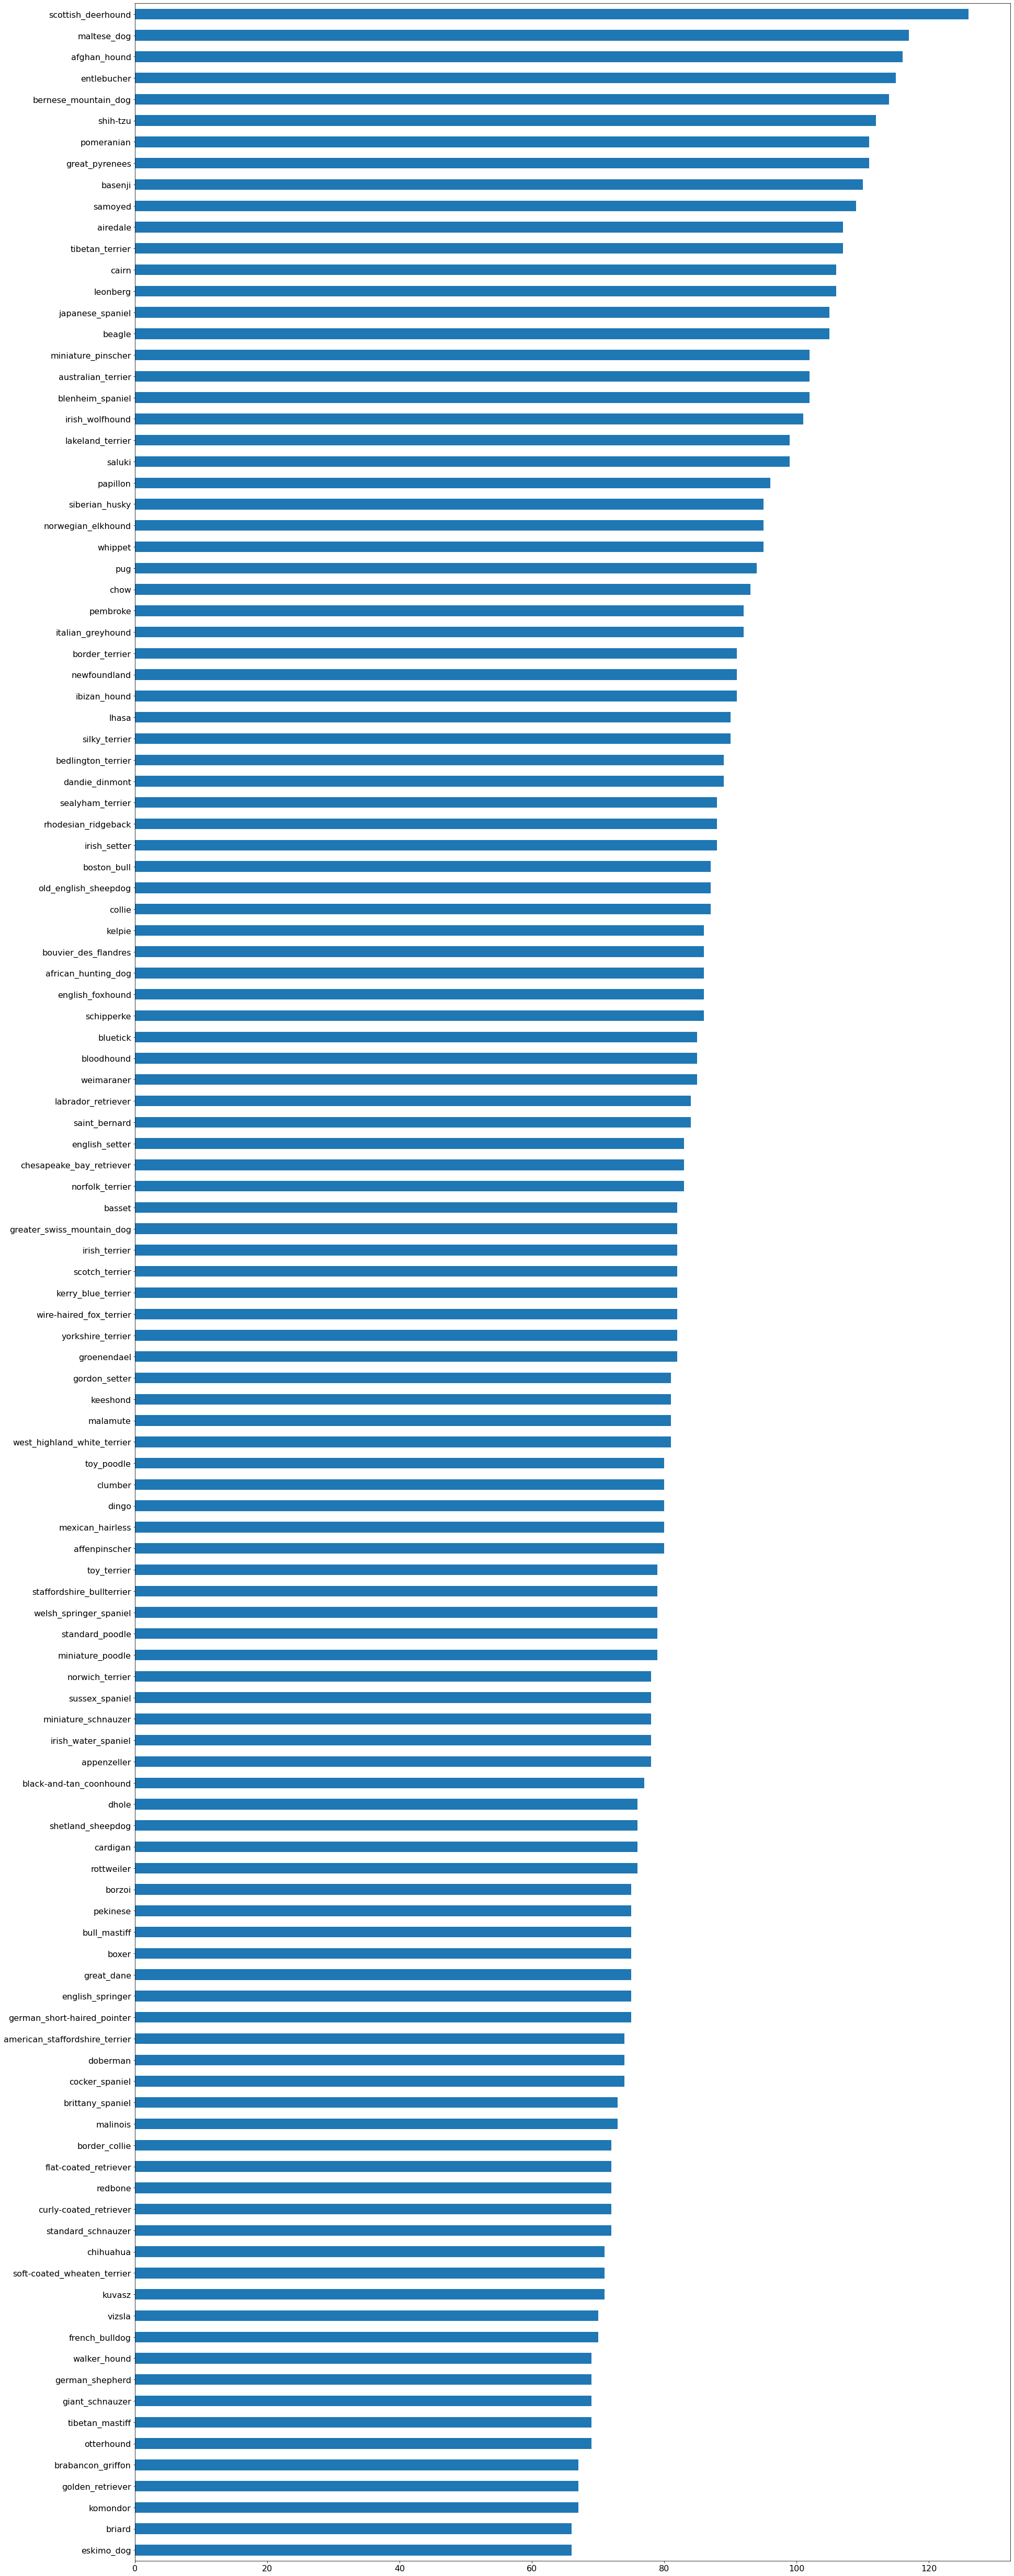

In [ ]:
# visualising frequencies 

bar_plot = train_labels['breed'].value_counts(ascending=True).plot.barh(figsize=(30,90))
bar_plot.tick_params(labelsize=16)
plt.show()

In [ ]:
train_labels['breed'].value_counts(ascending=False)

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
golden_retriever         67
komondor                 67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

In [ ]:
def load_images_from_dir(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img = cv2.resize(img,(224,224))
            images.append(np.array(img))
    images = np.array(images)
    return images

train_images = load_images_from_dir(TRAIN_DIR)

In [ ]:
train_labels=train_labels.drop(['id','breed','path_img'],axis=1)
train_labels.head()

,lbl
0,19
1,37
2,85
3,15
4,49


In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_images,train_labels,test_size=0.05,random_state=2)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9710, 224, 224, 3), (9710, 1), (512, 224, 224, 3), (512, 1))

In [ ]:
# Pytorch imports

import torch
from torch import nn
import torch.optim as optim

from torch.optim import lr_scheduler
from torch.nn import Module, Sigmoid, Linear, ReLU, Softmax

from torch.utils.data import Dataset, random_split, DataLoader
from torch.optim import SGD
from torch.nn.init import kaiming_uniform_, xavier_uniform_
from torch.nn import CrossEntropyLoss, BCELoss

import torchvision
from torchvision import datasets,transforms,models

plt.ion()

In [ ]:
# data transformations

data_transforms = {
    # data augmentation and normalization for training data
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.4),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                             std=[0.229, 0.224, 0.225]) # ImageNet standards
    ]), 
    # data normalization for validation data
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                             std=[0.229, 0.224, 0.225]) # ImageNet standards
    ]),
}


In [ ]:
# custom class inheriting Dataset to be used to load the dataset 

class DogDataset(Dataset):
    def __init__(self, df, root_dir, transform=None):
        self.df = df
        self.transform = transform
        self.root_dir = root_dir
        
    def __len__(self):
        return len(self.df)    
    
    def __getitem__(self, idx):
        row = self.df.loc[idx]
        img_id, img_label = row['id'], row['lbl']
        img_fname = self.root_dir + '/' + str(img_id) + '.jpg'
        img = Image.open(img_fname)
        if self.transform:
            img = self.transform(img)
        return img, img_label

In [ ]:
# loading data

train_data = DogDataset(X_train,y_train,data_transforms['train'])

train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=4,
                                           shuffle=True,
                                           num_workers=4)

test_data = DogDataset(X_test, y_test, data_transforms['val'])

test_loader = torch.utils.data.DataLoader(test_data,
                                         batch_size=4,
                                         shuffle=True,
                                         num_workers=4)

In [ ]:
class CNNModel(nn.Module):
    def __init__(self,model,num_classes):
        super(CNNModel,self).__init__()
        self.base_model = nn.Sequential(*list(model.children())[:-1]) # model excluding last FC layer
        self.Linear1 = nn.Linear(25088,512)
        self.relu = nn.ReLU()
        self.Linear2 = nn.Linear(512,num_classes)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self,x):
        x = self.base_model(x)
        x1 = torch.flatten(x,1)
        x1 = self.Linear1(x1)
        x1 = self.relu(x1)
        x2 = self.Linear2(x1)
        x2 = self.softmax(x2)
        
        return x1,x2

In [ ]:
train_loss = []
train_accuracy = []
valid_loss = []
valid_accuracy = []

# utiliy function to train model for one epoch


def train_model(model,optimizer,criterion,scheduler,epoch):
    
    model.train()
    scheduler.step()
    tr_loss = 0
    correct = 0
    total = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        if torch.cuda.is_available():
            data = data.cuda()
            target = target.cuda()
            
        # Clearing the Gradients of the model parameters
        optimizer.zero_grad()
        output = model(data)
        pred = torch.max(output.data, 1)[1]
        correct += (pred == target).sum()
        total += len(data)
        
        # Computing the loss
        loss = criterion(output, target)
        
        # Computing the updated weights of all the model parameters
        loss.backward()
        optimizer.step()
        tr_loss = loss.item()
        if (batch_idx + 1)% 100 == 0:
            print('Training Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f} \t Accuracy: {} %'.format(
                epoch, (batch_idx + 1) * len(data), len(train_loader.dataset),
                100. * (batch_idx + 1) / len(train_loader), loss.item(),100 * correct / total))
            torch.save(model.state_dict(), './model.pth')
            torch.save(model.state_dict(), './optimizer.pth')
    train_loss.append(tr_loss / len(train_loader))
    train_accuracy.append(100 * correct / total)

    return model

In [ ]:
# utility function to evaluate model

def evaluate(data_loader):
    model.eval()
    loss = 0
    correct = 0
    total = 0
    for data, target in data_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        if torch.cuda.is_available():
            data = data.cuda()
            target = target.cuda()
        
        output = model(data)
        loss += nn.functional.cross_entropy(output, target, size_average=False).item()
        pred = torch.max(output.data, 1)[1]
        total += len(data)
        correct += (pred == target).sum()
    loss /= len(data_loader.dataset)
    valid_loss.append(loss)    
    valid_accuracy.append(100 * correct / total)
    print('\nAverage Validation loss: {:.5f}\tAccuracy: {} %'.format(loss, 100 * correct / total))

In [ ]:
# utility function to plot graph

def plot_graph(epochs):
    fig = plt.figure(figsize=(20,4))
    ax = fig.add_subplot(1, 2, 1)
    plt.title("Train - Validation Loss")
    plt.plot(list(np.arange(epochs) + 1) , train_loss, label='train')
    plt.plot(list(np.arange(epochs) + 1), valid_loss, label='validation')
    plt.xlabel('num_epochs', fontsize=12)
    plt.ylabel('loss', fontsize=12)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.legend(loc='best')
    
    ax = fig.add_subplot(1, 2, 2)
    plt.title("Train - Validation Accuracy")
    plt.plot(list(np.arange(epochs) + 1) , train_accuracy, label='train')
    plt.plot(list(np.arange(epochs) + 1), valid_accuracy, label='validation')
    plt.xlabel('num_epochs', fontsize=12)
    plt.ylabel('accuracy', fontsize=12)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.legend(loc='best')

In [ ]:
# defining model, criterion,optimizer

model = models.vgg19_bn(pretrained=True) # base pre-trained model

# freeze all parameters
# for param in model.parameters():
#     param.requires_grad = False

model = CNNModel(model,120)
optimizer = optim.Adam(model.parameters(),lr=0.01)
criterion = nn.CrossEntropyLoss()

if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
    
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
# training the model over multiple epochs

num_epochs = 40

start = time.time()

for epoch in range(num_epochs):
    model = train_model(model,optimizer,criterion,exp_lr_scheduler,epoch)
    evaluate(test_loader)

print('='*20)
    
end = time.time()
time_elapsed = end - since   
print('Total time taken for training = {:.0f}m {:.0f}s'.format(time_elapsed//60,time_elapsed%60))

/opt/conda/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


AttributeError: Caught AttributeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 198, in _worker_loop
    data = fetcher.fetch(index)
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "<ipython-input-45-2f4738436d4f>", line 13, in __getitem__
    row = self.df.loc[idx]
AttributeError: 'numpy.ndarray' object has no attribute 'loc'


In [ ]:
!pip install torchsummary

In [ ]:
from torchsummary import summary

summary(model,input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
            Conv2d-4         [-1, 64, 224, 224]          36,928
       BatchNorm2d-5         [-1, 64, 224, 224]             128
              ReLU-6         [-1, 64, 224, 224]               0
         MaxPool2d-7         [-1, 64, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]          73,856
       BatchNorm2d-9        [-1, 128, 112, 112]             256
             ReLU-10        [-1, 128, 112, 112]               0
           Conv2d-11        [-1, 128, 112, 112]         147,584
      BatchNorm2d-12        [-1, 128, 112, 112]             256
             ReLU-13        [-1, 128, 112, 112]               0
        MaxPool2d-14          [-1, 128,